<a href="https://colab.research.google.com/github/Chapa0000/DS2/blob/main/PreE_DSII_JRodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL

# DATA SCIENCE II

## ALUMNO: JORGE RODRIGUEZ
## COMISION: 61160
## PROFESOR: IGNACIO RUSSO LOCATTI
## TUTOR: EMANUEL TEVEZ

Mediante un Dataset de ventas de Adidas en Estados Unidos en los años 2020 y 2021 se intentara demostrar el fuerte impacto de la pandemia en las ventas y el crecimiento exponencial de las ventas online.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


spreadsheet_id = '1ZeLJ_O2UqZzhMdnxJpMttfEJePlNTFKh'

url = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=xlsx'

url = pd.read_excel(url, engine='openpyxl')

In [2]:
url.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [3]:
# Eliminar las 3 primeras filas

url = url.iloc[3:]

In [4]:
url.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,NaN,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,NaN,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,NaN,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store


In [5]:
# Asignar la primera fila como indice

url = url.rename(columns=url.iloc[0]).drop(url.index[0])
url.head()


,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,NaN,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,NaN,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,NaN,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,NaN,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [6]:
# Eliminar la primer columna

url = url.drop(url.columns[0], axis=1)



In [7]:
url.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [8]:
# Revisar tipos de datos y valores nulos

url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 4 to 9651
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


# Como vemos no hay valores nulos, igual instalamos y corremos missingno para mostrar el grafico.

In [9]:
!pip install missingno

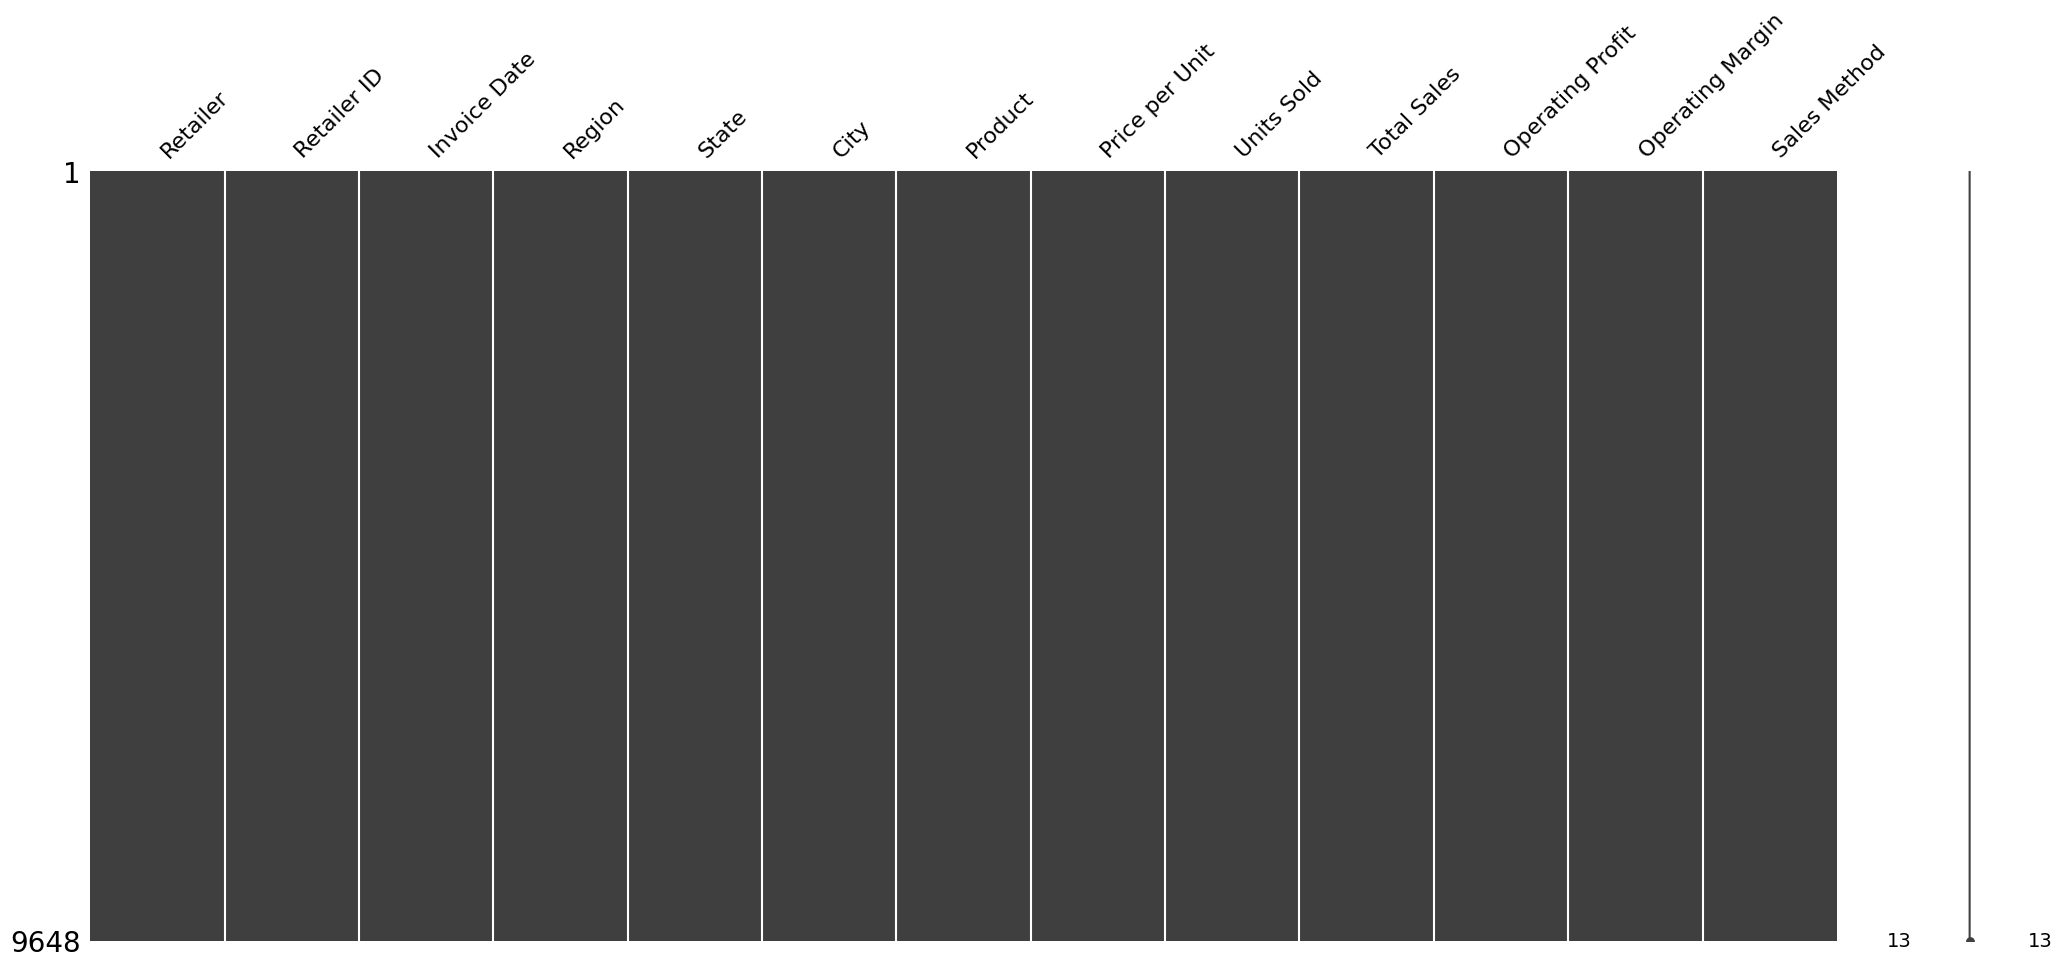

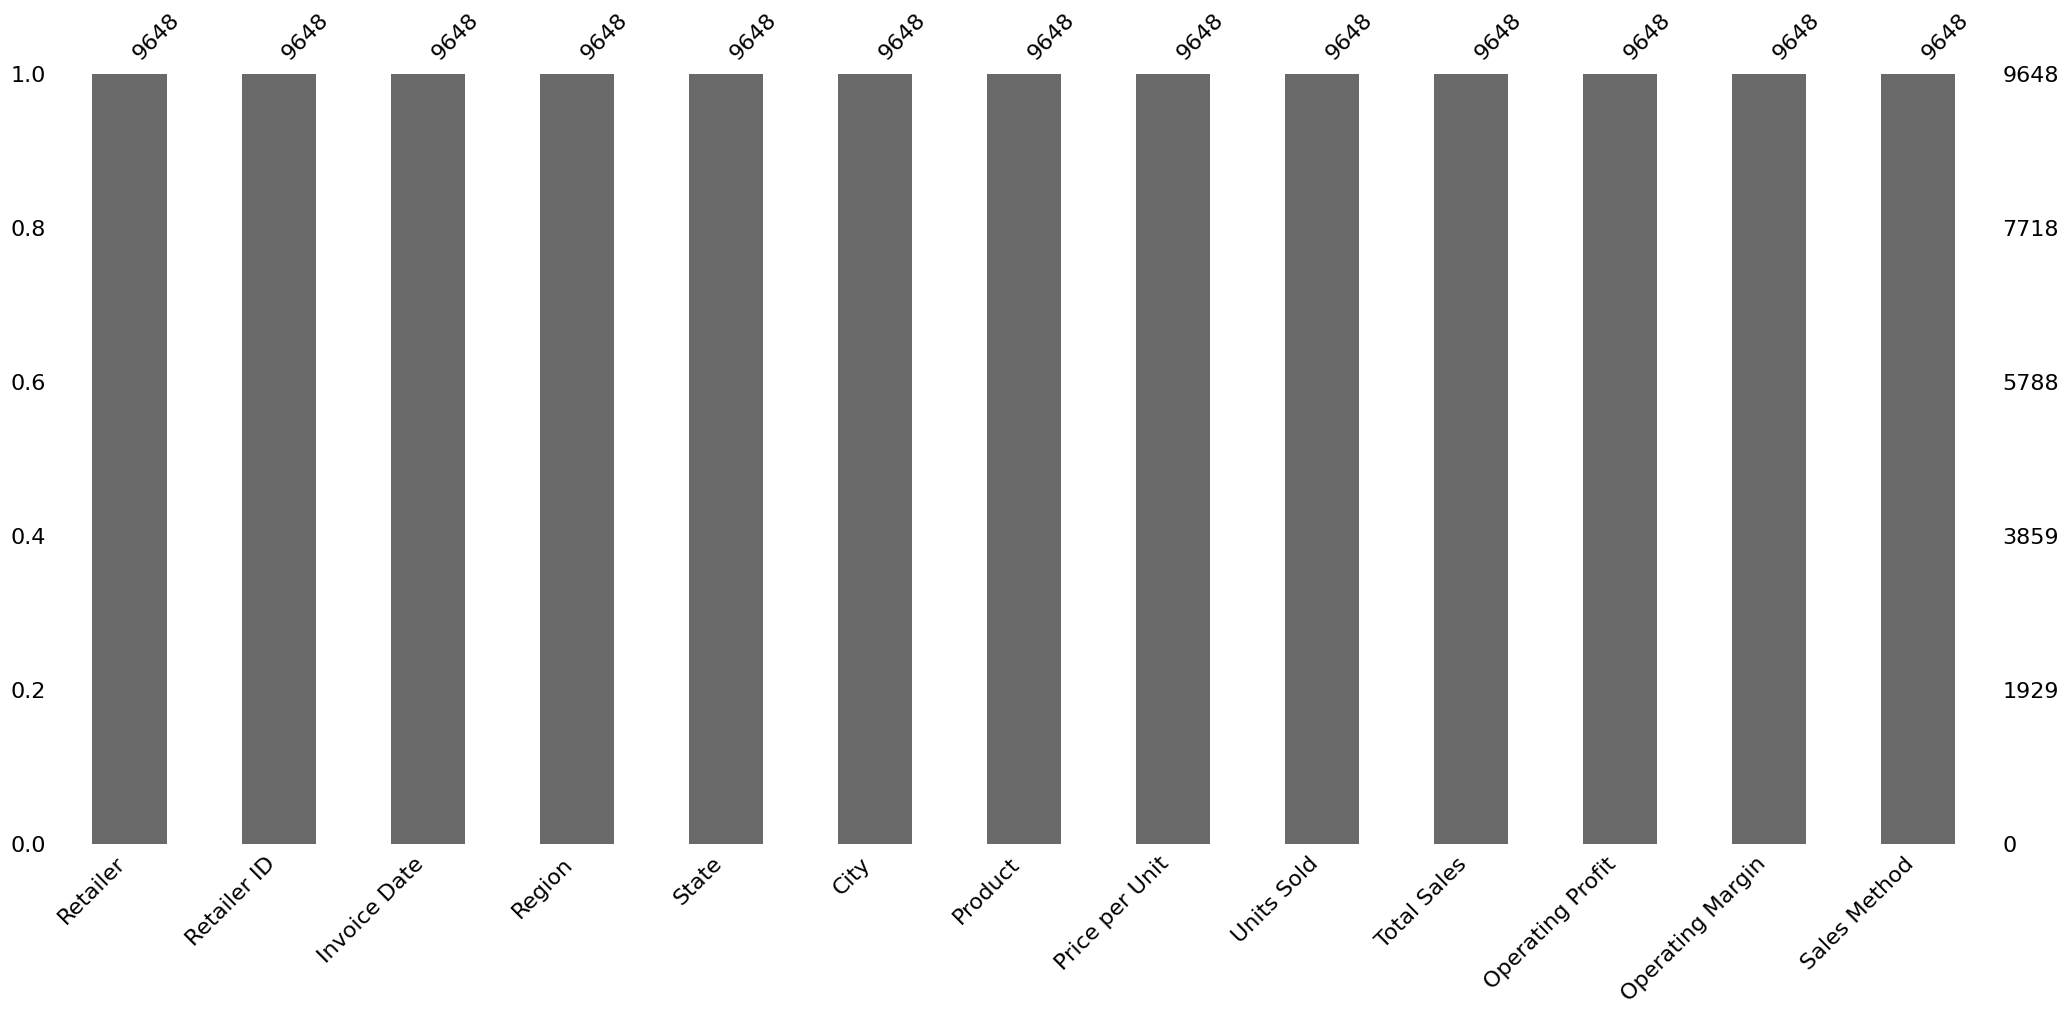

In [10]:
import missingno as msno

# Visualizar el mapa de calor de valores faltantes
msno.matrix(url)
plt.show()

# Visualizar la barra de valores faltantes
msno.bar(url)
plt.show()

In [11]:
# eliminamos la columna retailer id ya que no va a aportar informacion relevante
url = url.drop('Retailer ID', axis=1)

In [12]:
url.describe().T

<ipython-input-12-b5846e29d9f3>:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  url.describe().T


,count,unique,top,freq
Retailer,9648,6,Foot Locker,2637
Invoice Date,9648,724,2021-01-17 00:00:00,77
Region,9648,5,West,2448
State,9648,50,California,432
City,9648,52,Portland,360
Product,9648,6,Men's Street Footwear,1610
Price per Unit,9648,146,50,557
Units Sold,9648,361,225,207
Total Sales,9648,3512,100000,52
Operating Profit,9648,6510,21000,34


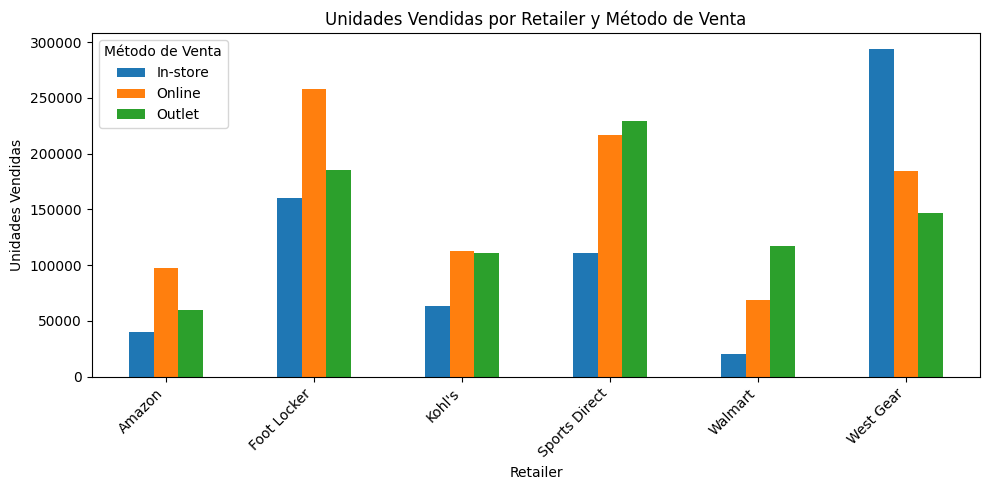

In [13]:
# Visualizaciones

# Agrupar por Retailer y Método de Venta y sumar las unidades vendidas
unidades_por_retailer_metodo = url.groupby(['Retailer', 'Sales Method'])['Units Sold'].sum().unstack()

# Crear el gráfico
unidades_por_retailer_metodo.plot(kind='bar', figsize=(10, 5))
plt.title('Unidades Vendidas por Retailer y Método de Venta')
plt.xlabel('Retailer')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Método de Venta')
plt.tight_layout()
plt.show()


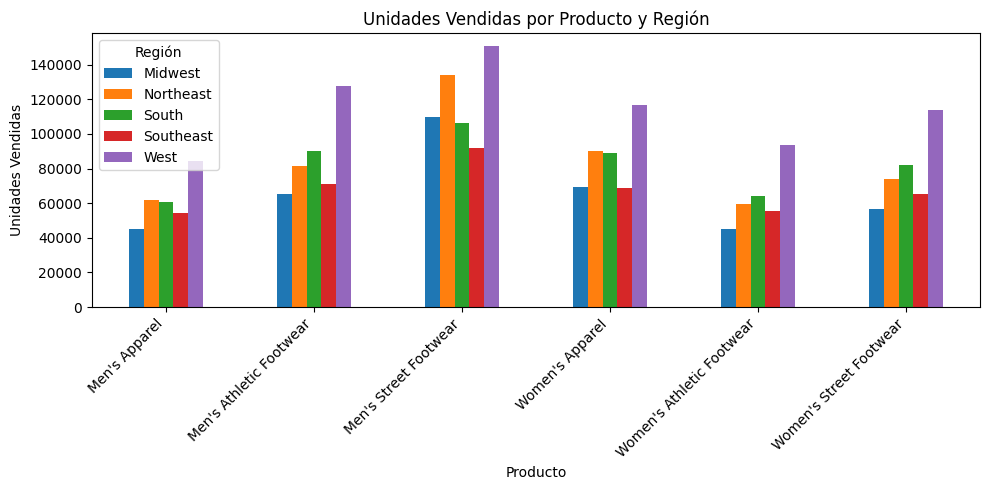

In [14]:
# Grafico de ventas de producto por region

# Agrupar por Product y Region y sumar las unidades vendidas
unidades_por_producto_region = url.groupby(['Product', 'Region'])['Units Sold'].sum().unstack()

# Crear el gráfico
unidades_por_producto_region.plot(kind='bar', figsize=(10, 5))
plt.title('Unidades Vendidas por Producto y Región')
plt.xlabel('Producto')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Región')
plt.tight_layout()
plt.show()


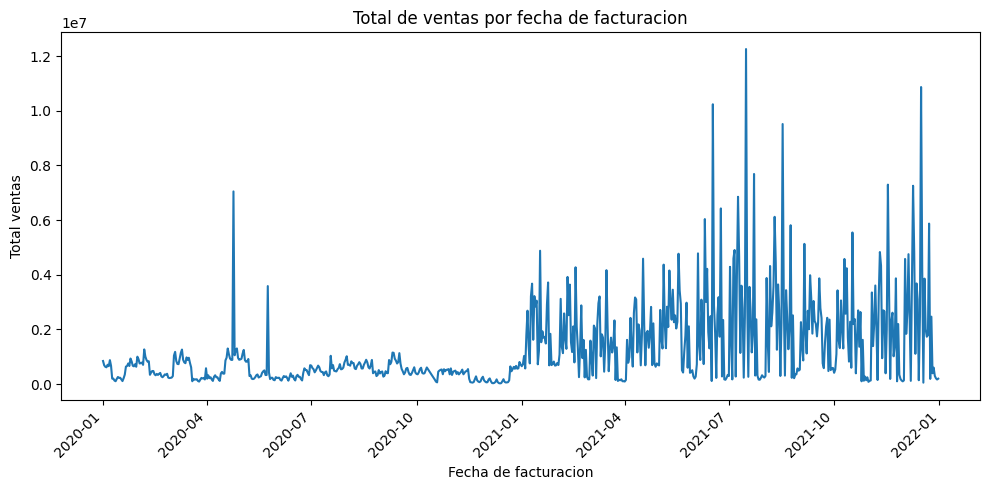

In [15]:
# Grafico de ventas por fecha de facturacion

# Convertir la columna 'Invoice Date' a tipo datetime
url['Invoice Date'] = pd.to_datetime(url['Invoice Date'])

# Agrupar por 'Invoice Date' y sumar 'Total Sales'
total_sales_por_fecha = url.groupby('Invoice Date')['Total Sales'].sum()

# Crear el gráfico
plt.figure(figsize=(10, 5))
plt.plot(total_sales_por_fecha.index, total_sales_por_fecha.values)
plt.title('Total de ventas por fecha de facturacion')
plt.xlabel('Fecha de facturacion')
plt.ylabel('Total ventas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


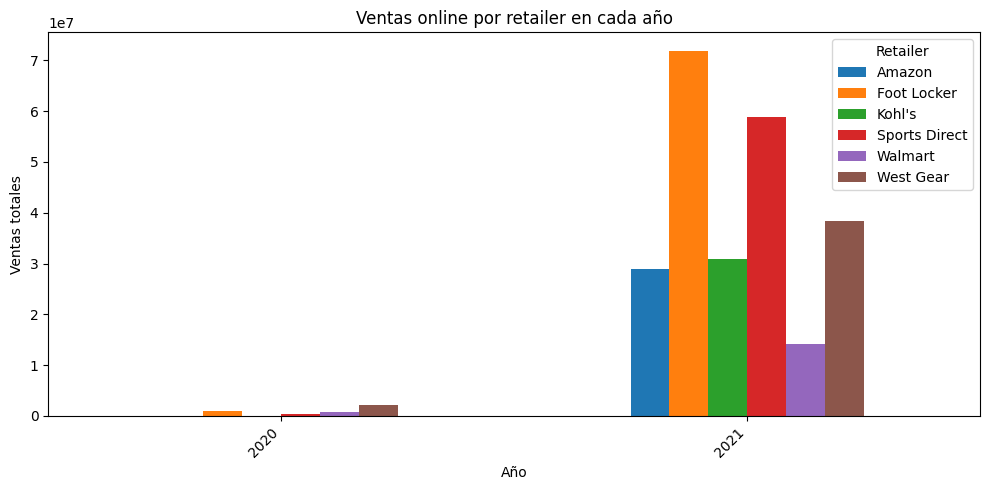

In [16]:
# Ventas online de retailer por año

# Extraer el año de la fecha de facturación
url['Year'] = url['Invoice Date'].dt.year

# Filtrar las ventas online
online_sales = url[url['Sales Method'] == 'Online']

# Agrupar por año, retailer y sumar las ventas totales
retailer_online_sales_by_year = online_sales.groupby(['Year', 'Retailer'])['Total Sales'].sum().unstack()

# Crear un gráfico para visualizar las ventas online por retailer en cada año
retailer_online_sales_by_year.plot(kind='bar', figsize=(10, 5))
plt.title('Ventas online por retailer en cada año')
plt.xlabel('Año')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Retailer')
plt.tight_layout()
plt.show()

PARA ENCONTRAR LAS MEJORES CORRELACIONES UTILIZAMOS UN MAPA DE CALOR, PARA ESTO NECESITAMOS QUE TODOS LOS DATOS SEAN NUMERICOS.

In [17]:
# Pasar a numericas las columnas retailer, region, state, city, product y Sales method

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convertir las columnas a numéricas
for column in ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']:
  url[column] = le.fit_transform(url[column])

# Mostrar el DataFrame actualizado
print(url.head())

   Retailer Invoice Date  Region  State  City  Product Price per Unit  \
4         1   2020-01-01       1     31    35        2             50   
5         1   2020-01-02       1     31    35        1             50   
6         1   2020-01-03       1     31    35        5             40   
7         1   2020-01-04       1     31    35        4             45   
8         1   2020-01-05       1     31    35        0             60   

  Units Sold Total Sales Operating Profit Operating Margin  Sales Method  Year  
4       1200      600000           300000              0.5             0  2020  
5       1000      500000           150000              0.3             0  2020  
6       1000      400000           140000             0.35             0  2020  
7        850      382500           133875             0.35             0  2020  
8        900      540000           162000              0.3             0  2020  


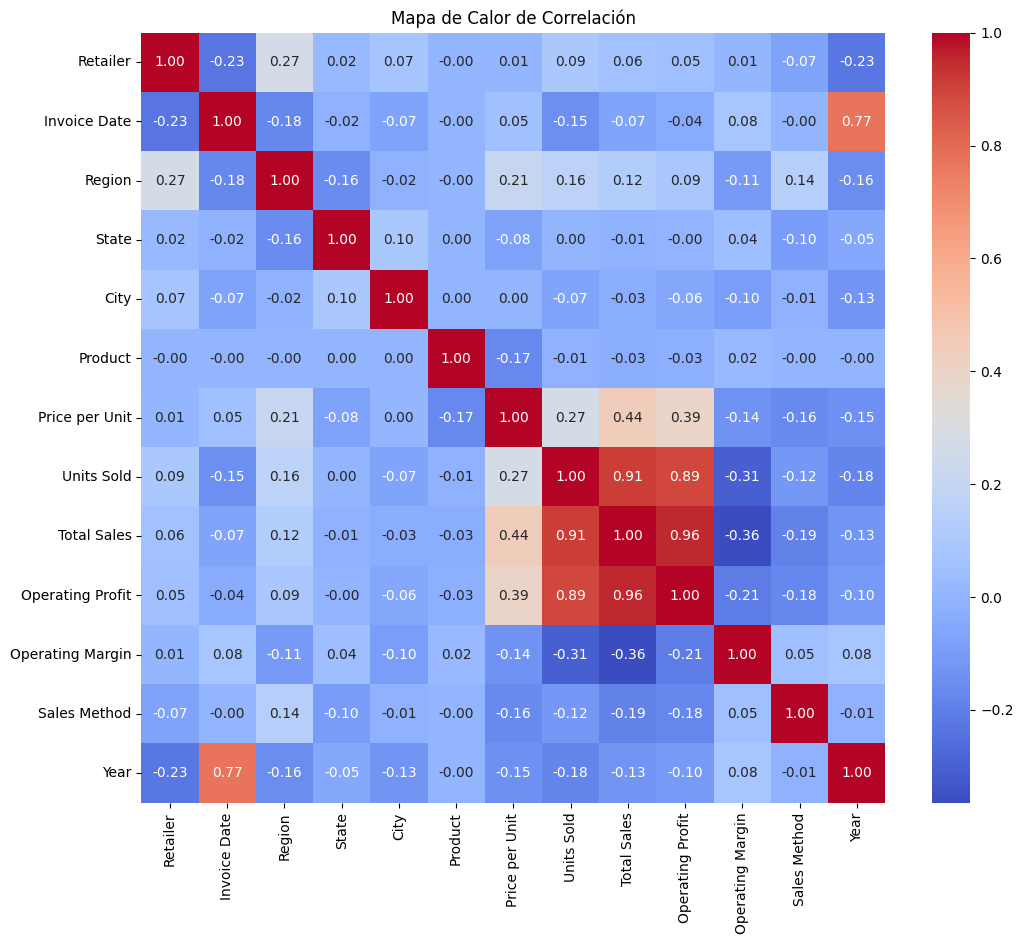

In [18]:
# Crear el mapa de calor
plt.figure(figsize=(12, 10))  # Ajustar el tamaño de la figura
sns.heatmap(url.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

Esto nos demuestra lo obvio, que a mayores unidades vendidas mayores son las ventas totales y mayor es la ganancia.

In [19]:
# Separar el dataframe en train y test

from sklearn.model_selection import train_test_split

# Suponiendo que 'url' es tu DataFrame y 'Total Sales' es tu variable objetivo
X = url.drop('Total Sales', axis=1)  # Características
y = url['Total Sales']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train e y_train son los datos de entrenamiento
# X_test e y_test son los datos de prueba

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (7718, 12)
Tamaño del conjunto de prueba: (1930, 12)


In [22]:
from sklearn.linear_model import LinearRegression

# Filtrar el DataFrame para incluir solo el año 2021
url_2021 = url[url['Year'] == 2021]

# Convertir la columna 'Invoice Date' a numérica (por ejemplo, usando timestamp)
# Esto convierte las fechas a segundos desde el epoch (1 de enero de 1970)
url_2021['Invoice Date'] = pd.to_numeric(pd.to_datetime(url_2021['Invoice Date']))

# Suponiendo que 'url_2021' es tu DataFrame y 'Total Sales' es tu variable objetivo
X_2021 = url_2021.drop('Total Sales', axis=1)  # Características
y_2021 = url_2021['Total Sales']  # Variable objetivo

# Separar los datos en conjuntos de entrenamiento y prueba
X_train_2021, X_test_2021, y_train_2021, y_test_2021 = train_test_split(
    X_2021, y_2021, test_size=0.2, random_state=42
)

# Entrenar el modelo de regresión lineal con los datos de 2021
model_2021 = LinearRegression()
model_2021.fit(X_train_2021, y_train_2021)


<ipython-input-22-f574adff7102>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_2021['Invoice Date'] = pd.to_numeric(pd.to_datetime(url_2021['Invoice Date']))


LinearRegression()

MSE (2021): 883379302.1724429
R^2 (2021): 0.9467575196358743


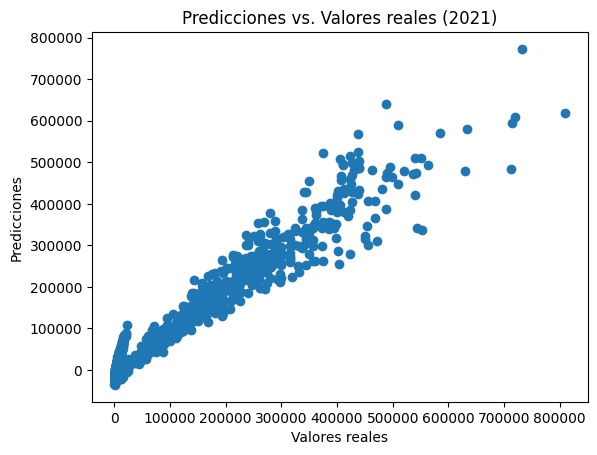

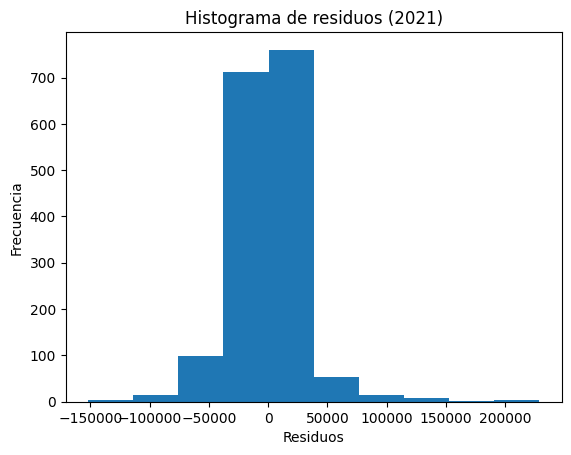

In [23]:
# Validamos el modelo de regresion lineal

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred_2021 = model_2021.predict(X_test_2021)

# Evaluar el modelo utilizando métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
from sklearn.metrics import mean_squared_error, r2_score

mse_2021 = mean_squared_error(y_test_2021, y_pred_2021)
r2_2021 = r2_score(y_test_2021, y_pred_2021)

print(f"MSE (2021): {mse_2021}")
print(f"R^2 (2021): {r2_2021}")


# Visualizar las predicciones vs. los valores reales para ver qué tan bien se ajusta el modelo
plt.scatter(y_test_2021, y_pred_2021)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores reales (2021)")
plt.show()


# Analizar los residuos para detectar patrones o sesgos en el modelo
residuals_2021 = y_test_2021 - y_pred_2021
plt.hist(residuals_2021)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de residuos (2021)")
plt.show()

El valor de MSE dio alto, lo que sugiere que las predicciones del modelo están relativamente alejadas de los valores reales.
Esto puede deberse a un alto nivel de variabilidad en los datos o a que el modelo no está ajustando correctamente a los datos, lo que podría implicar que se necesita mejorar el modelo.
Por otro lado el R^2 indica un alto grado de ajuste entre el modelo y los datos en cuestión, lo que sugiere que el modelo es bastante bueno para predecir o explicar la variabilidad de los datos observados.
Las visualizaciones apoyan la teoria de que el modelo es bueno.